In [1]:
#!pip install geemap
import os
import sys

#Get the absolute path to the parent of current working directory 
cwd    = os.getcwd()
source_path = os.path.join(cwd, 'source')
sys.path.append(source_path)
sys.path

import eoMosaic as stacMoz
import eoImage as eoIM

In [2]:
ottawa_region = {
    'type': 'Polygon',
    'coordinates': [
       [
         [-76.120,45.184], 
         [-75.383,45.171],
         [-75.390,45.564], 
         [-76.105,45.568], 
         [-76.120,45.184]
       ]
    ]
}

tile55_922 = {
    'type': 'Polygon',
    'coordinates': [
       [
         [-77.6221, 47.5314], 
         [-73.8758, 46.7329],
         [-75.0742, 44.2113], 
         [-78.6303, 44.9569],
         [-77.6221, 47.5314]
       ]
    ]
}

sub_region = {
    'type': 'Polygon',
    'coordinates': [
       [[-78.6303, 44.2113], [-77.04546666666667, 44.2113], [-77.04546666666667, 45.318], [-78.6303, 45.318], [-78.6303, 44.2113]]
    ]
}

In [3]:
start_str    = '2019-07-01'
end_str      = '2019-07-31'
scale        = 20
ssr_data     = eoIM.SSR_META_DICT['S2_SR']

#base_img = stacMoz.get_base_Image(ssr_data, sub_region, 'EPSG:3979', 100, start_str, end_str)
#base_img = eoIM.attach_AngleBands(base_img, ssr_data)
    
mosaic = stacMoz.period_mosaic(ssr_data, tile55_922, 'EPSG:3979', scale, start_str, end_str)
#sub_mosaic = stacMoz.get_sub_mosaic(ssr_data, sub_region, 'EPSG:3979', 200, start_str, end_str)

#base_img = eoIM.apply_gain_offset(base_img, ssr_data, 100, False)
#base_img.odc.geobox
#display(mosaic)

#eoIM.export_mosaic(mosaic, 'c:\test_xr_output', scale, 'EPSG:3979')

Found: 156 datasets
<get_STAC_ImColl> The bbox of the given region =  [-78.6303, 44.2113, -73.8758, 47.5314]
[                                        ] | 1% Completed | 4.31 s ms

C:\Users\fqq\miniconda3\envs\stac\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(
C:\Users\fqq\miniconda3\envs\stac\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


[                                        ] | 2% Completed | 4.79 s

C:\Users\fqq\miniconda3\envs\stac\Lib\site-packages\rasterio\warp.py:344: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


[########################################] | 100% Completed | 105.75 s
<period_mosaic> create a sub-mosaic for  [[-78.6303, 44.2113], [-77.04546666666667, 44.2113], [-77.04546666666667, 45.318], [-78.6303, 45.318], [-78.6303, 44.2113]]
Found: 82 datasets
<get_STAC_ImColl> The bbox of the given region =  [-78.6303, 44.2113, -77.04546666666667, 45.318]
[########################################] | 100% Completed | 15m 10s

Finished applying gain and offset



MemoryError: Unable to allocate 2.93 GiB for an array with shape (13, 7741, 7829) and data type float32

In [3]:
#%%time
#stac_IC = stac_IC.compute()

# actually load it
#from dask.diagnostics import ProgressBar
#with ProgressBar():
#  base_Img.load()

#stac_IC.red.plot.imshow(col="time")
display(base_Img)

<xarray.Dataset> Size: 7GB
Dimensions:      (y: 23314, x: 23324)
Coordinates:
  * y            (y) float64 187kB 9.949e+04 9.947e+04 ... -3.668e+05 -3.668e+05
  * x            (x) float64 187kB 1.226e+06 1.226e+06 ... 1.693e+06 1.693e+06
    spatial_ref  int32 4B 3979
    time         datetime64[ns] 8B 2021-07-30T16:20:56.893000
Data variables:
    blue         (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    green        (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    red          (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    nir08        (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    swir16       (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    swir22       (y, x) uint16 1GB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    scl          (y, x) uint8 544MB 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

'\nmasked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\nmasked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)\n'

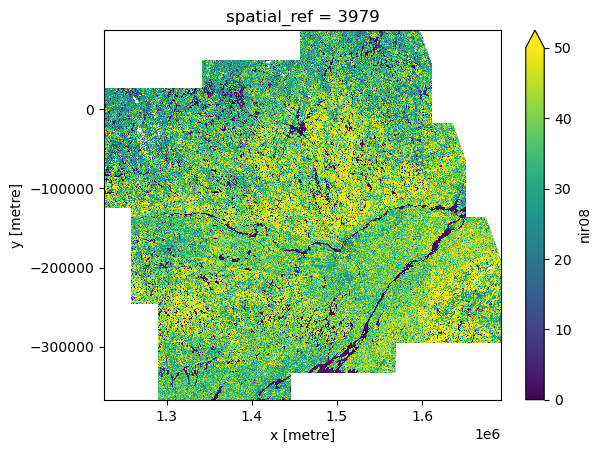

In [4]:
'''
scl = stac_IC.scl
condition = (stac_IC > 0) & (scl != 3) & (scl != 8) & (scl != 9)  # & (scl != 10)
masked_IC = stac_IC.where(condition)

median_image = masked_IC.median(dim='time')
'''

mosaic.nir08.plot.imshow(vmin=0, vmax=50)

'''
masked_IC.isel(time=5).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=15).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
masked_IC.isel(time=24).to_array("band").plot.imshow(col="band", size=4, vmin=500, vmax=4000)
'''

In [6]:
scored_img_coll = stacM.attach_score(stac_IC)
display(scored_img_coll)

<xarray.Dataset> Size: 53GB
Dimensions:      (y: 27909, x: 25226, time: 5)
Coordinates:
  * y            (y) float64 223kB 1.41e+05 1.41e+05 ... -4.171e+05 -4.171e+05
  * x            (x) float64 202kB 1.209e+06 1.209e+06 ... 1.714e+06 1.714e+06
    spatial_ref  int32 4B 3979
  * time         (time) datetime64[ns] 40B 2022-07-02T16:11:17.032000 ... 202...
Data variables:
    blue         (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    green        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    red          (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    nir08        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir16       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir22       (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    scl          (time, y, x) uint8 4GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    score        (time, y, x) uint16 7GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

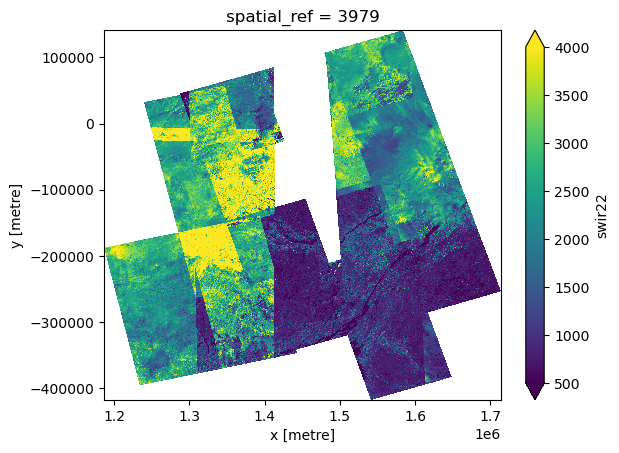

In [6]:
median_image.swir22.plot.imshow(vmin=500, vmax=4000)

In [9]:
stac_IC.sizes['time']

7

In [3]:
import xarray as xr
import numpy as np

# Step 1: Import the required modules (done)

# Step 2: Create a simple xarray dataset
data1 = np.random.rand(4, 3)
data2 = np.random.randint(0, 100, size=(4, 3))

ds = xr.Dataset(
    {
        "temperature": (("x", "y"), data1),
        "precipitation": (("x", "y"), data2)
    },
    coords={
        "x": [0, 1, 2, 3],
        "y": [0, 1, 2]
    }
)

print("Original Data Types:")
print(ds) 

# Step 3: Change the data type of the 'temperature' and 'precipitation' variables
ds = ds.astype(np.float32)


print("\n\nNew Data Types:")
print(ds)  # Output: float32


Original Data Types:
<xarray.Dataset> Size: 172B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float64 96B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) int32 48B 70 82 10 29 18 89 30 11 7 77 11 57


New Data Types:
<xarray.Dataset> Size: 124B
Dimensions:        (x: 4, y: 3)
Coordinates:
  * x              (x) int32 16B 0 1 2 3
  * y              (y) int32 12B 0 1 2
Data variables:
    temperature    (x, y) float32 48B 0.5453 0.5308 0.7008 ... 0.4494 0.9391
    precipitation  (x, y) float32 48B 70.0 82.0 10.0 29.0 ... 7.0 77.0 11.0 57.0


In [5]:
import certifi
certifi.where()

'C:\\Users\\lsun\\Anaconda3\\envs\\stac\\Lib\\site-packages\\certifi\\cacert.pem'

In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import rioxarray

# Create a sample xarray dataset
data = {
    "temperature": (("time", "lat", "lon"), np.random.randn(5, 10, 10)),
    "humidity": (("time", "lat", "lon"), np.random.rand(5, 10, 10)),
}

coords = {
    "time": pd.date_range("2023-01-01", periods=5),
    "lat": np.linspace(-90, 90, 10),
    "lon": np.linspace(-180, 180, 10)
}

dataset = xr.Dataset(data, coords=coords)

# Set spatial dimensions and CRS for each variable
for var in dataset.data_vars:
    dataset[var] = dataset[var].rio.write_crs("EPSG:4326")

# Output each variable to a separate GeoTIFF file
for var in dataset.data_vars:
    for t in range(len(dataset.time)):
        time_str = str(dataset.time[t].values).split('T')[0]
        file_name = f"{var}_{time_str}.tif"
        dataset[var].isel(time=t).rio.to_raster(file_name)

print("Variables have been saved to separate GeoTIFF files.")



MissingSpatialDimensionError: y dimension not found. 'rio.set_spatial_dims()' or using 'rename()' to change the dimension name to 'y' can address this. Data variable: temperature